In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

In [77]:
# Veri setini dataframe olarak yukleyelim
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv("house_price_regression_dataset.csv")

# ilk 5 satiri goruntuleyelim

df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,"262,382.85"
1,4272,3,3,2016,4.75,1,6,"985,260.85"
2,3592,1,2,2016,3.63,0,9,"777,977.39"
3,966,1,2,1977,2.73,1,8,"229,698.92"
4,4926,2,1,1993,4.70,0,8,"1,041,740.86"


In [78]:
# veri setinde herhangi bir null yani eksik veri kontrolu var mi?

df.isnull().sum()

# burada sutun bazli null verilerin sayisi goruntuleniyor
# her sutun icin 0 degerini gozlemliyorum. Bu durumda null veri yok

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [79]:
# dataframe'de yer alan sayisal sutunlarin istatistiksel ozelliklerini goruntuleyelim

df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,"2,815.42",2.99,1.97,"1,986.55",2.78,1.02,5.62,"618,861.02"
std,"1,255.51",1.43,0.82,20.63,1.30,0.81,2.89,"253,568.06"
min,503.00,1.00,1.00,"1,950.00",0.51,0.00,1.00,"111,626.85"
25%,"1,749.50",2.00,1.00,"1,969.00",1.67,0.00,3.00,"401,648.23"
50%,"2,862.50",3.00,2.00,"1,986.00",2.81,1.00,6.00,"628,267.29"
75%,"3,849.50",4.00,3.00,"2,004.25",3.92,2.00,8.00,"827,141.28"
max,"4,999.00",5.00,3.00,"2,022.00",4.99,2.00,10.00,"1,108,236.84"


In [80]:
# veri seti hakkinda genel bilgi almak icin info() fonksiyonunu kullaniyorum

# ciktidan da anlasilacagi uzere, 1000 tane satir ve 8 tane sutun var
# bellek kullanimi 593.9 kb, butun veriler non-null
# bu durumda veri setinde eksik veri yok

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


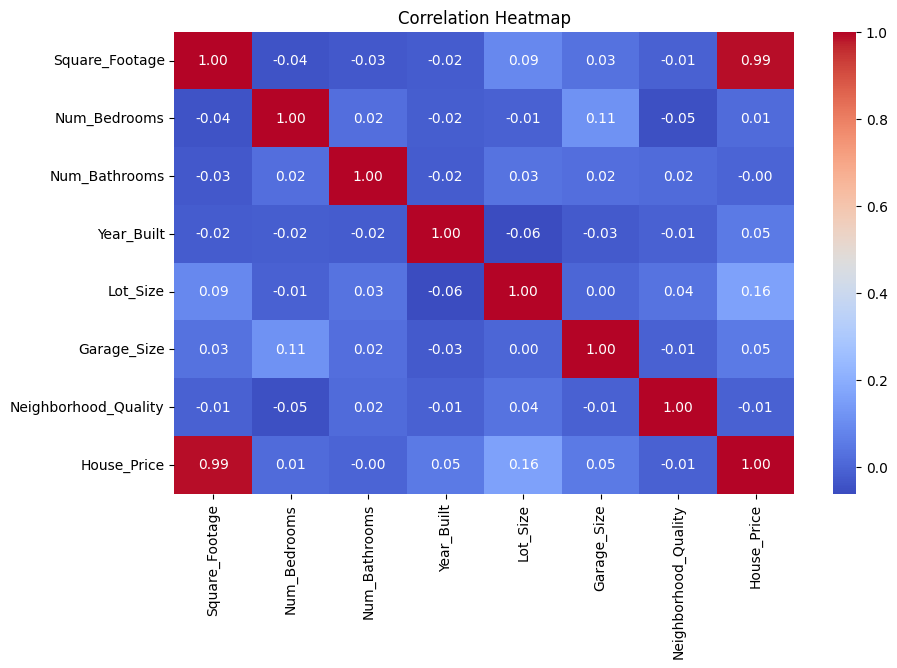

In [81]:
# burada her sutunun diger sutunlarla olan korelasyonunu goruntuluyorum
# korelasyon degerleri -1 ile 1 arasinda degisiyor
# 1'e yakin degerler pozitif, -1'e yakin degerler negatif korelasyon anlamina geliyor
# 0'a yakin degerler ise iki sutun arasinda bir iliski olmadigini gosteriyor

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

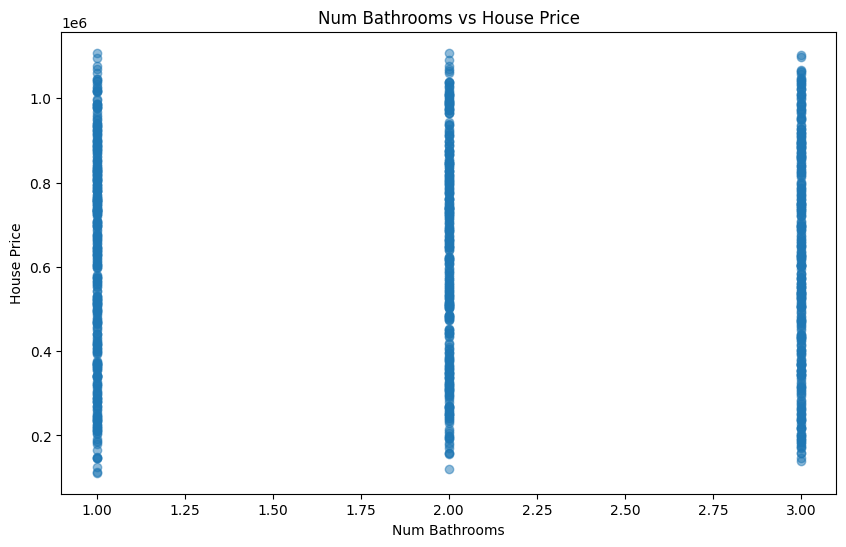

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Num_Bathrooms"], df["House_Price"], alpha=0.5)
plt.title("Num Bathrooms vs House Price")
plt.xlabel("Num Bathrooms")
plt.ylabel("House Price")
plt.show()

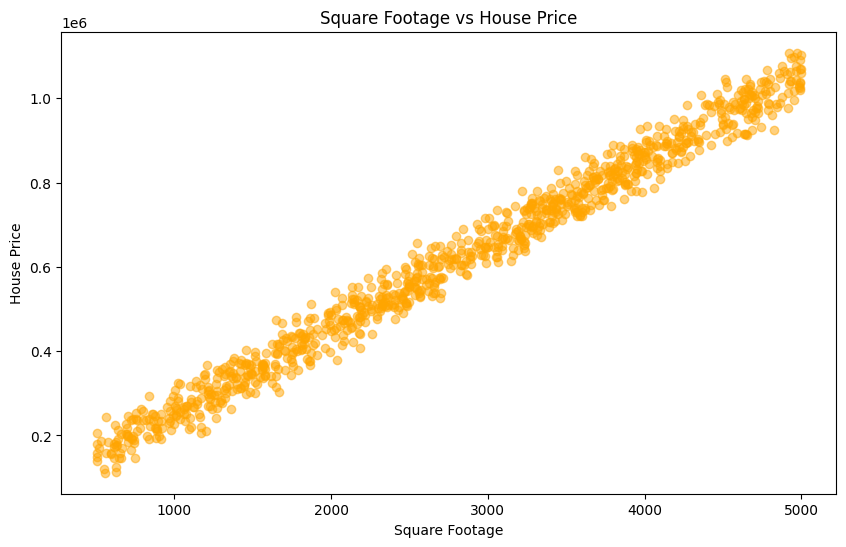

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Square_Footage"], df["House_Price"], alpha=0.5, color='orange')
plt.title("Square Footage vs House Price")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()

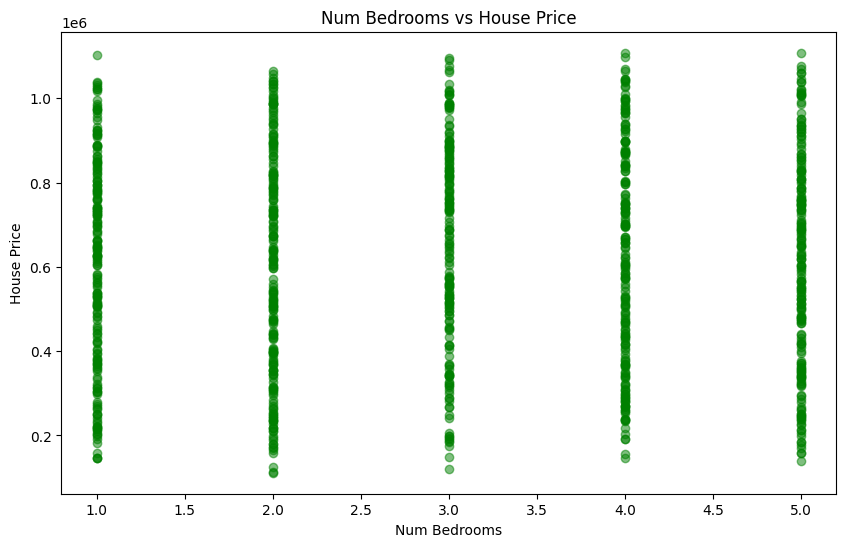

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Num_Bedrooms"], df["House_Price"], alpha=0.5, color='green')
plt.title("Num Bedrooms vs House Price")
plt.xlabel("Num Bedrooms")
plt.ylabel("House Price")
plt.show()

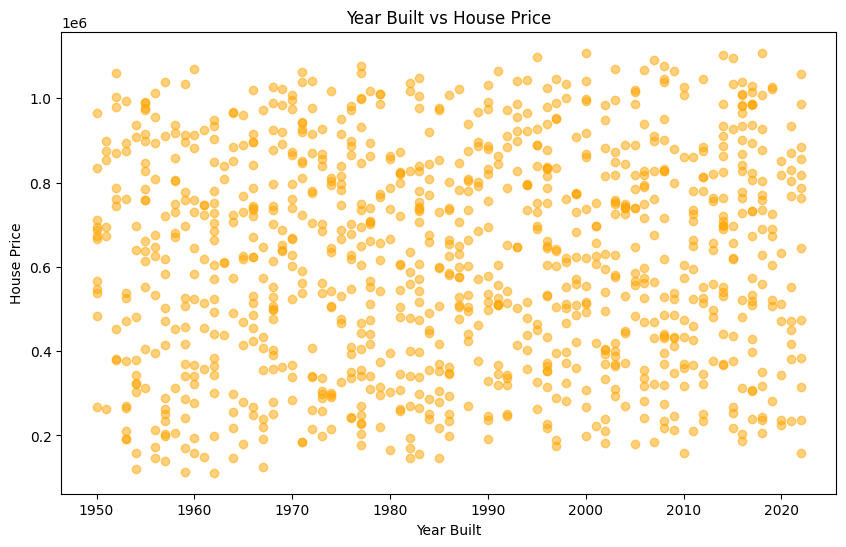

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Year_Built"], df["House_Price"], alpha=0.5, color='orange')
plt.title("Year Built vs House Price")
plt.xlabel("Year Built")
plt.ylabel("House Price")
plt.show()

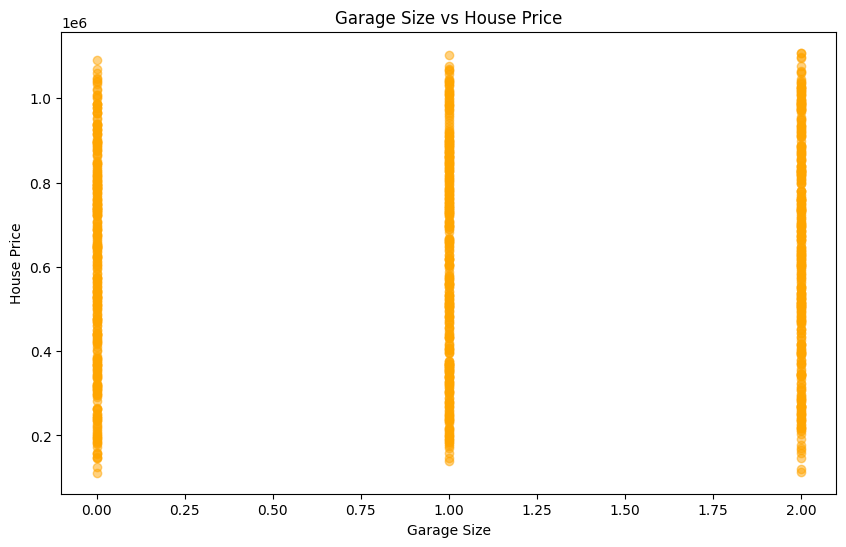

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Garage_Size"], df["House_Price"], alpha=0.5, color='orange')
plt.title("Garage Size vs House Price")
plt.xlabel("Garage Size")
plt.ylabel("House Price")
plt.show()

In [87]:
X = df.drop("House_Price", axis=1)
y = df["House_Price"]

# veriyi %80 eğitim ve %20 test olarak ayırıyorum

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)
y_pred = linearRegressionModel.predict(X_test)
print("Linear Regression Model")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Model
Mean Absolute Error: 8174.583600008648
Mean Squared Error: 101434798.50566667
Root Mean Squared Error: 10071.484424138613
R2 Score: 0.9984263636823408


Decision Tree Model
Mean Absolute Error: 24311.874477306643
Mean Squared Error: 1008267125.2450291
Root Mean Squared Error: 31753.222281290273
R2 Score: 0.9843579738949376


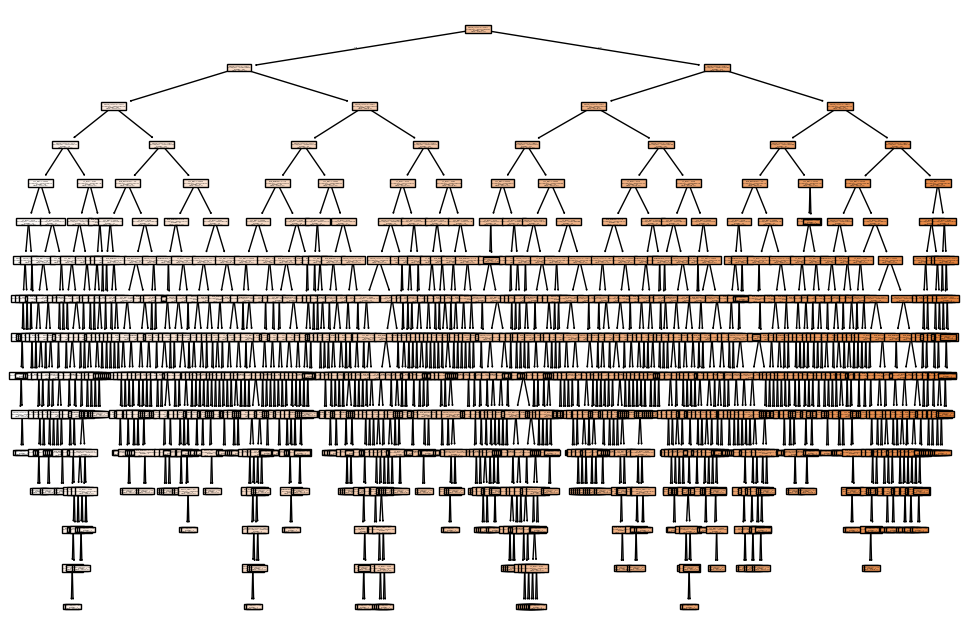

In [89]:
decisionTreeModel = DecisionTreeRegressor()
decisionTreeModel.fit(X_train, y_train)
y_pred = decisionTreeModel.predict(X_test)
print("Decision Tree Model")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(decisionTreeModel, filled=True, feature_names=X.columns)
plt.show()

In [90]:
randomForestModel = RandomForestRegressor()
randomForestModel.fit(X_train, y_train)
y_pred = randomForestModel.predict(X_test)
print("Random Forest Model")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Random Forest Model
Mean Absolute Error: 15974.451134334873
Mean Squared Error: 384975360.88627243
Root Mean Squared Error: 19620.788997547283
R2 Score: 0.9940275800985523
